In [25]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder,PowerTransformer
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from imblearn.over_sampling import SMOTEN
from sklearn import tree
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df.head()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
df.columns=["Id","RI","NA","Mg","Al","Si","K","Ca","Ba","Fe","Type"]
print(df.columns)

Index(['Id', 'RI', 'NA', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [4]:
df.head()

,Id,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      213 non-null    int64  
 1   RI      213 non-null    float64
 2   NA      213 non-null    float64
 3   Mg      213 non-null    float64
 4   Al      213 non-null    float64
 5   Si      213 non-null    float64
 6   K       213 non-null    float64
 7   Ca      213 non-null    float64
 8   Ba      213 non-null    float64
 9   Fe      213 non-null    float64
 10  Type    213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [6]:
df.isnull().sum()

Id      0
RI      0
NA      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df

,Id,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
df.shape

(213, 11)

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,213.0,108.000000,61.631972,2.00000,55.00000,108.00000,161.00000,214.00000
RI,213.0,1.518353,0.003039,1.51115,1.51652,1.51768,1.51915,1.53393
NA,213.0,13.406761,0.818371,10.73000,12.90000,13.30000,13.83000,17.38000
Mg,213.0,2.676056,1.440453,0.00000,2.09000,3.48000,3.60000,3.98000
Al,213.0,1.446526,0.499882,0.29000,1.19000,1.36000,1.63000,3.50000
Si,213.0,72.655023,0.774052,69.81000,72.28000,72.79000,73.09000,75.41000
K,213.0,0.499108,0.653035,0.00000,0.13000,0.56000,0.61000,6.21000
Ca,213.0,8.957934,1.426435,5.43000,8.24000,8.60000,9.18000,16.19000
Ba,213.0,0.175869,0.498245,0.00000,0.00000,0.00000,0.00000,3.15000
Fe,213.0,0.057277,0.097589,0.00000,0.00000,0.00000,0.10000,0.51000


In [11]:
print(df["Id"].value_counts)  # ID variable will be deleted
df = df.drop("Id", axis=1)  # We dropped the id variable.

<bound method IndexOpsMixin.value_counts of 0        2
1        3
2        4
3        5
4        6
      ... 
208    210
209    211
210    212
211    213
212    214
Name: Id, Length: 213, dtype: int64>


In [12]:
df.head()

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [13]:
# now we will check for correlation of columns
df.corr()

,RI,NA,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.193436,-0.128118,-0.405671,-0.540010,-0.287900,0.812495,0.001062,0.145791,-0.161322
NA,-0.193436,1.000000,-0.276486,0.157928,-0.068519,-0.265520,-0.275314,0.327233,-0.240802,0.504983
Mg,-0.128118,-0.276486,1.000000,-0.480035,-0.160359,0.009397,-0.444559,-0.492149,0.086906,-0.744004
Al,-0.405671,0.157928,-0.480035,1.000000,-0.009226,0.324484,-0.260372,0.478936,-0.076456,0.597754
Si,-0.540010,-0.068519,-0.160359,-0.009226,1.000000,-0.197684,-0.210141,-0.104361,-0.097674,0.147767
K,-0.287900,-0.265520,0.009397,0.324484,-0.197684,1.000000,-0.318649,-0.043790,-0.009586,-0.012765
Ca,0.812495,-0.275314,-0.444559,-0.260372,-0.210141,-0.318649,1.000000,-0.113121,0.124674,0.000372
Ba,0.001062,0.327233,-0.492149,0.478936,-0.104361,-0.043790,-0.113121,1.000000,-0.059729,0.574896
Fe,0.145791,-0.240802,0.086906,-0.076456,-0.097674,-0.009586,0.124674,-0.059729,1.000000,-0.191090
Type,-0.161322,0.504983,-0.744004,0.597754,0.147767,-0.012765,0.000372,0.574896,-0.191090,1.000000


In [15]:
df['Type'].unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [17]:
#We will divide the 7 categories of label class in to two categories of 1 and 2
Type=[]
for i in df["Type"]:
    if i>=1 and i<=4:
        Type.append('1')
    elif i>=5 and i<=7:
        Type.append('2')
df["Type"]=Type
set(Type)

{'1', '2'}

In [18]:
# Now Checking for values
df['Type'].unique()

array(['1', '2'], dtype=object)

In [23]:
#Processing the Data
features = ['RI','NA','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type']

X = df[features]

y = df[label]

#### Checking For Skewness

In [28]:
X.skew().sort_values(ascending=False)

K     6.549276
Ba    3.406749
Ca    2.040591
Fe    1.747173
RI    1.639658
Al    0.900017
NA    0.457318
Si   -0.744546
Mg   -1.154323
dtype: float64

In [31]:
# removing the skweness of data by using Power transformation method
scaler=PowerTransformer()
X_new=scaler.fit_transform(X)
X_new

array([[-2.08166817e-17,  6.16990160e-01,  6.81474184e-01, ...,
        -8.82520734e-01, -4.56097489e-01, -6.82179894e-01],
       [-6.24500451e-17,  1.84791856e-01,  6.20551713e-01, ...,
        -9.36107476e-01, -4.56097489e-01, -6.82179894e-01],
       [-2.08166817e-17, -2.10309828e-01,  7.93248682e-01, ...,
        -4.87918486e-01, -4.56097489e-01, -6.82179894e-01],
       ...,
       [ 6.93889390e-17,  1.16274955e+00, -1.73883553e+00, ...,
        -2.82179217e-01,  2.37156428e+00, -6.82179894e-01],
       [-5.20417043e-17,  1.18552756e+00, -1.73883553e+00, ...,
        -2.45978517e-01,  2.37134679e+00, -6.82179894e-01],
       [-3.81639165e-17,  1.01381998e+00, -1.73883553e+00, ...,
        -1.22063682e-01,  2.37164215e+00, -6.82179894e-01]])

In [32]:
#CHECKING SKEWNESS:
pd.DataFrame(X_new,columns=X.columns).skew().sort_values(ascending=False)

Ba    1.817526
Fe    0.852473
Si    0.133867
Al    0.000874
RI    0.000000
NA   -0.009526
K    -0.075233
Ca   -0.207808
Mg   -0.911150
dtype: float64

In [38]:
#covert the transform value into the dataset ,we will get the values in the form of x:
X=df
X=X_new

In [43]:
LE=LabelEncoder()
df["Type"]=LE.fit_transform(df["Type"])

In [45]:
df.Type.value_counts()

0    162
1     51
Name: Type, dtype: int64

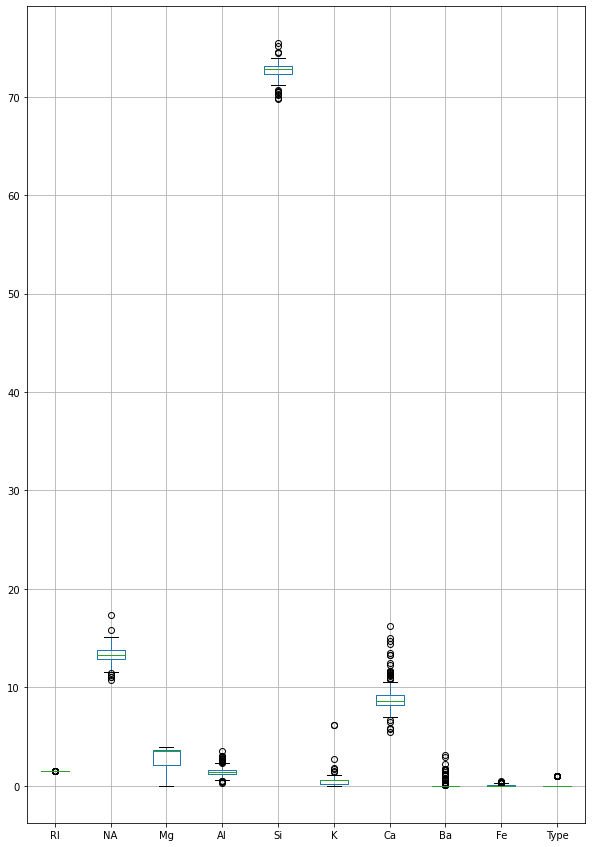

In [49]:
#Checking outliers
df.iloc[:,0:20].boxplot(figsize=[10,18])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [51]:
X.shape

(213, 9)

In [52]:
type(X)

numpy.ndarray